In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('Dallas_limpio.csv')
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-11-18,city scrape,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,Sasha,2010-11-26,within an hour,f,Oak Lawn,"['email', 'phone']",...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,2024-11-18,previous scrape,Additional discount for 2nd and 3rd month. Per...,"The address is 4340 Cedar Springs Road Dallas,...",Robert,2011-11-17,within an hour,f,Oak Lawn,"['email', 'phone', 'work_email']",...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,2024-11-18,city scrape,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,Michelle,2012-11-19,within an hour,f,Oak Lawn,"['email', 'phone']",...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,2024-11-18,city scrape,No description available,No overview available,Rodney,2011-07-11,a few days or more,f,North Central Dallas,"['email', 'phone']",...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,0.0,0.0,0.24
4,2024-11-18,city scrape,"Traveling nurses, SMU students welcome - 10% d...",Wonderful big trees and nice sidewalks through...,Judy,2012-12-27,within an hour,t,Old Lake Highlands,"['email', 'phone']",...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,0.0,0.0,0.72


In [ ]:
# Convertir columnas string a enteros o valores binarios
# Función para convertir columnas tipo 't'/'f' a 1 y 0
def convertir_tf(valor):
    return 1 if valor == 't' else 0

# Aplicar a las columnas relevantes
df['host_is_superhost'] = df['host_is_superhost'].apply(convertir_tf)
df['host_identity_verified'] = df['host_identity_verified'].apply(convertir_tf)
df['instant_bookable'] = df['instant_bookable'].apply(convertir_tf)

In [5]:
def convertir_bathrooms_text(valor):
    if pd.isna(valor):
        return 0  

    valor = valor.lower().strip()

    # Manejar "Half-bath" directamente
    if "half" in valor:
        return 4

    # Extraer el número inicial (1, 1.5, etc.)
    match = re.match(r'(\d+(\.\d+)?)', valor)
    if match:
        return float(match.group(1))

    # Si no matchea nada, asumimos 0 (por si llega algo raro)
    return 0

# Crear columna numérica de bathrooms
df['bathrooms_text'] = df['bathrooms_text'].apply(convertir_bathrooms_text)


In [6]:
# Transformar la columna 'property_type' a números enteros únicos
df['property_type'] = pd.factorize(df['property_type'])[0]

# Mostrar el mapeo de tipos de propiedad a números (opcional)
property_type_mapping = dict(zip(df['property_type'].unique(), df['property_type'].unique()))
print("Mapeo de tipos de propiedad a números:")
print(property_type_mapping)

Mapeo de tipos de propiedad a números:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), 

In [ ]:
# Dividir dataframe por tipo de habitación
df_types = {
    'Entire home/apt': df[df['room_type'] == 'Entire home/apt'].copy(),
    'Private room': df[df['room_type'] == 'Private room'].copy(),
    'Shared room': df[df['room_type'] == 'Shared room'].copy(),
    'Hotel room': df[df['room_type'] == 'Hotel room'].copy()
}

In [ ]:
# Función para scatter plot (gráficas de dispersión con puntos)
def scatter_plot(df, x, y, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

In [ ]:
# Función actualizada para mapa de calor enfocado
def heatmap_correlation(df, room_type):
    # Seleccionar solo las columnas que estamos comparando + price
    columnas_interes = [
        'host_acceptance_rate', 'host_is_superhost', 'review_scores_cleanliness', 
        'host_identity_verified', 'instant_bookable', 'property_type', 'bathrooms', 'price'
    ]
    columnas_presentes = [col for col in columnas_interes if col in df.columns]
    
    # Calcular la matriz de correlación solo para esas columnas
    corr = df[columnas_presentes].corr(numeric_only=True)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

    # Título personalizado
    plt.title(f'Mapa de calor (Correlaciones relevantes) - {room_type}')
    plt.show()


Comparaciones para: Entire home/apt


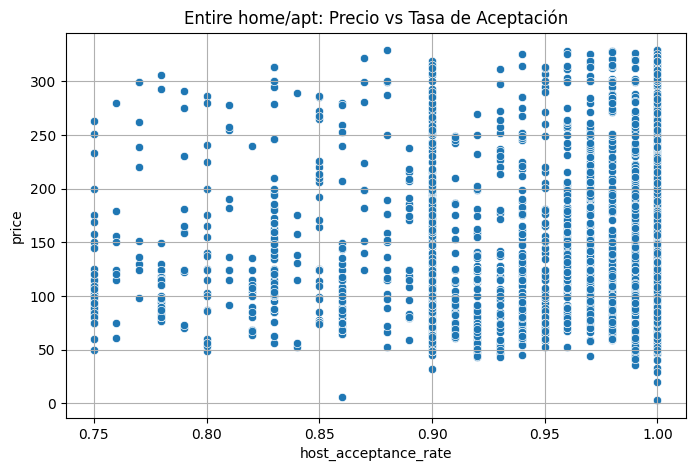

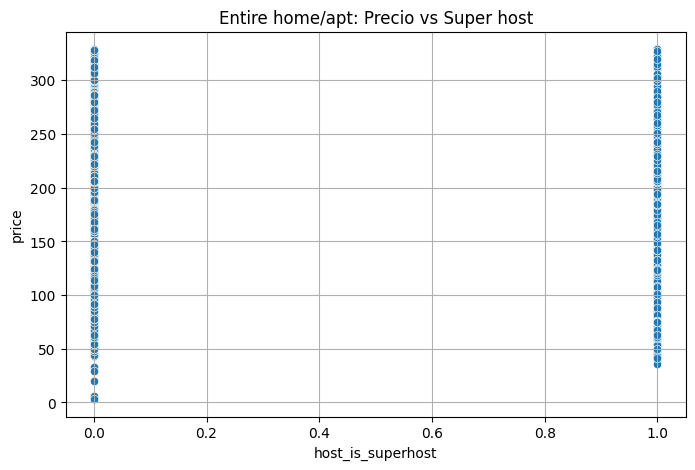

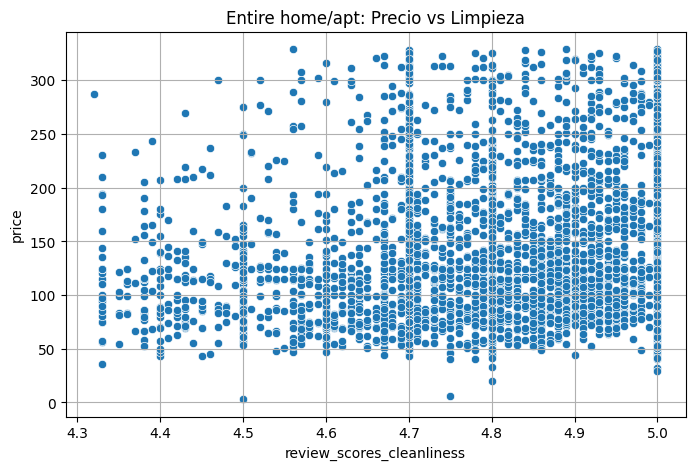

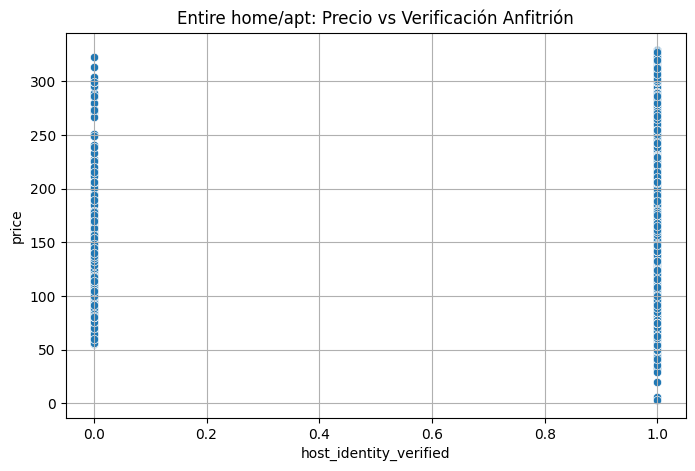

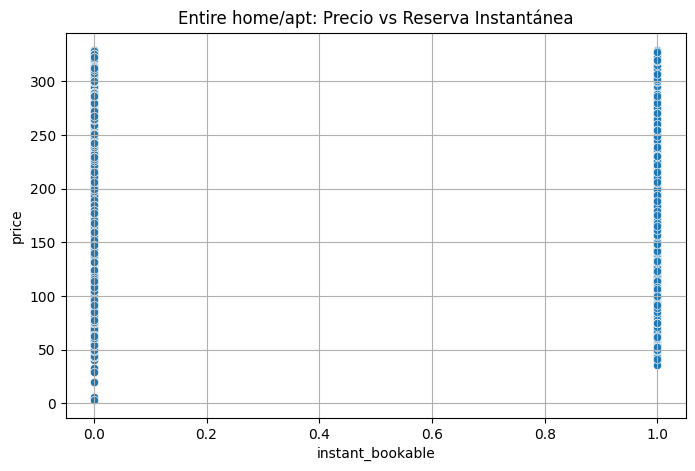

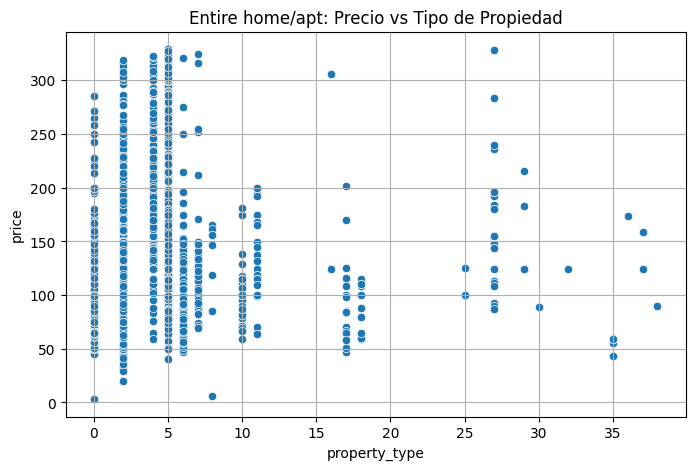

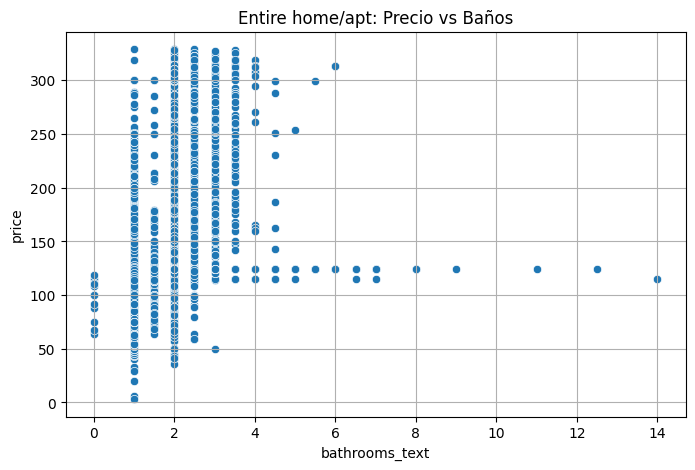

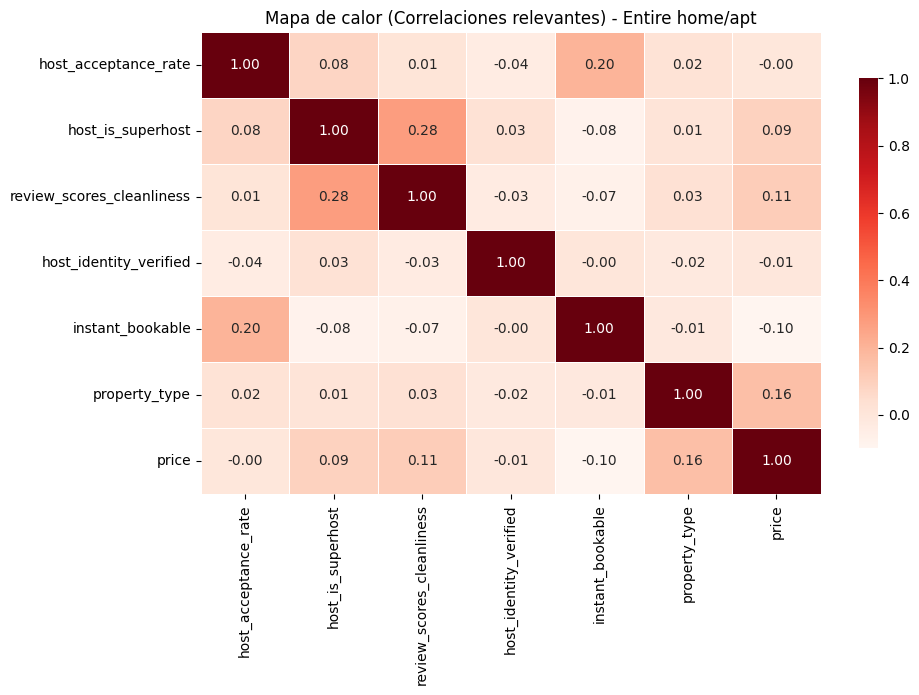


Comparaciones para: Private room


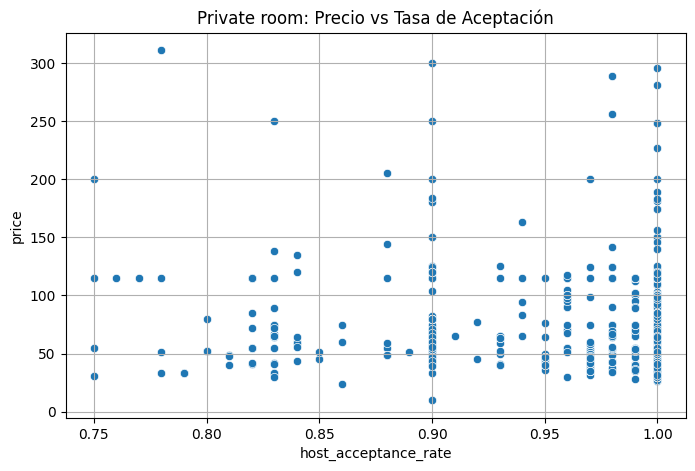

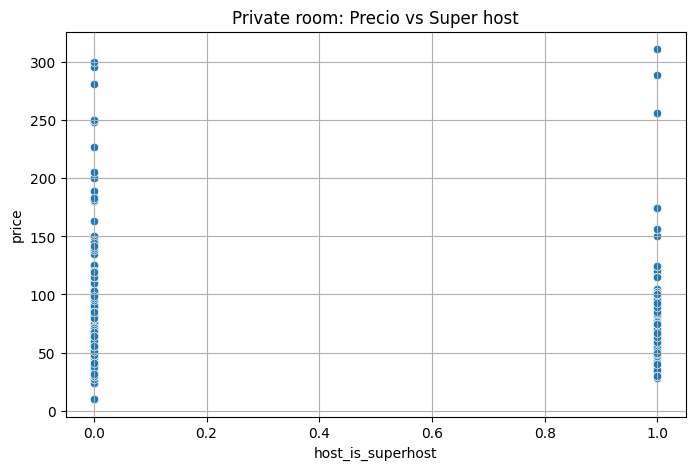

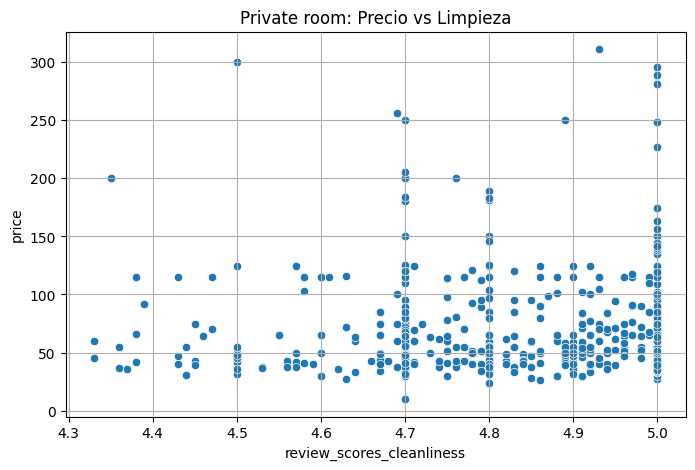

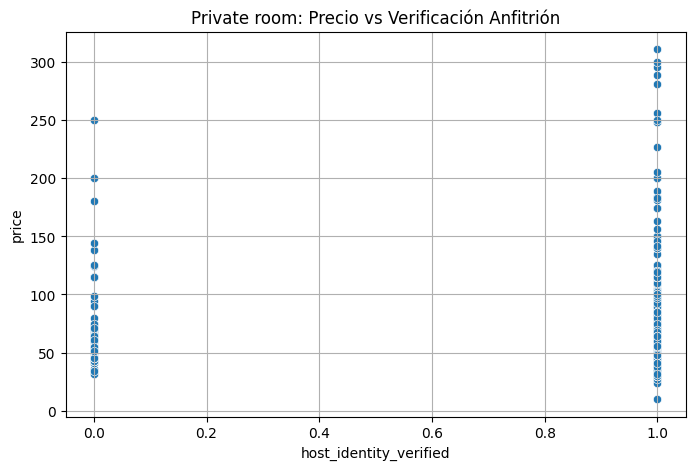

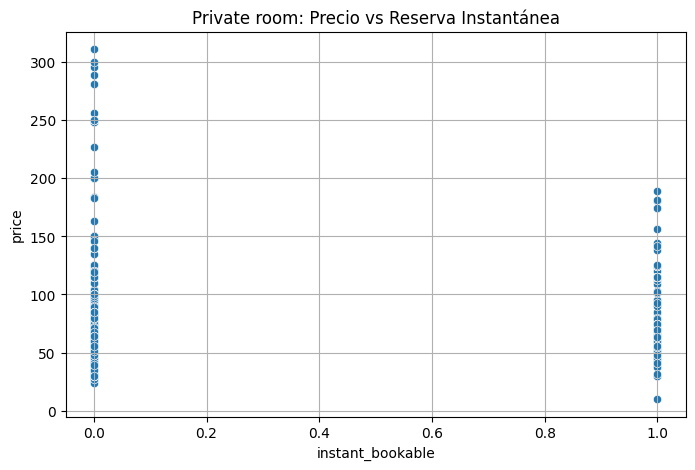

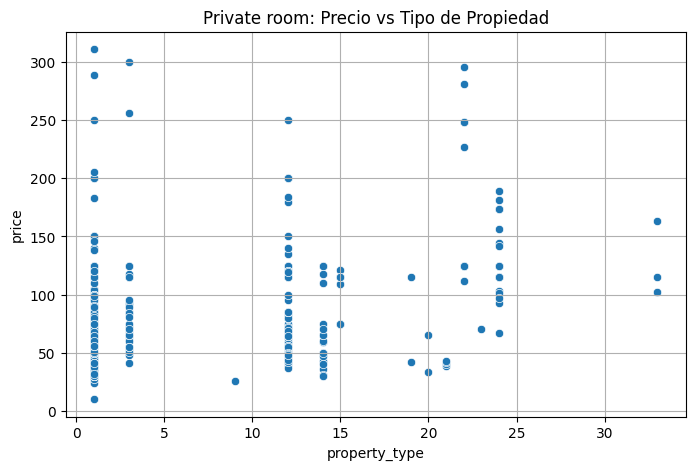

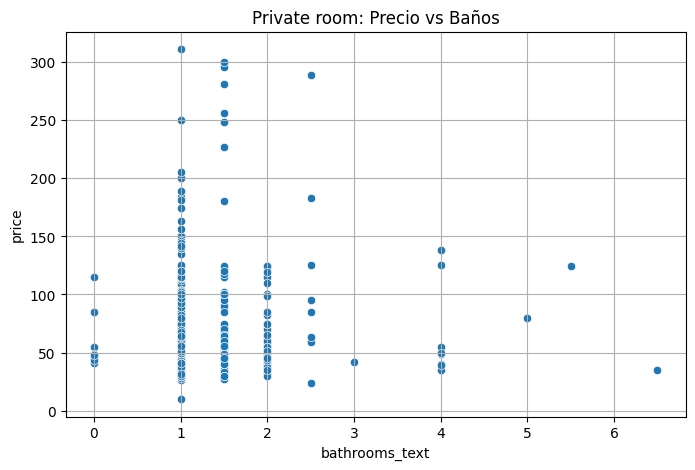

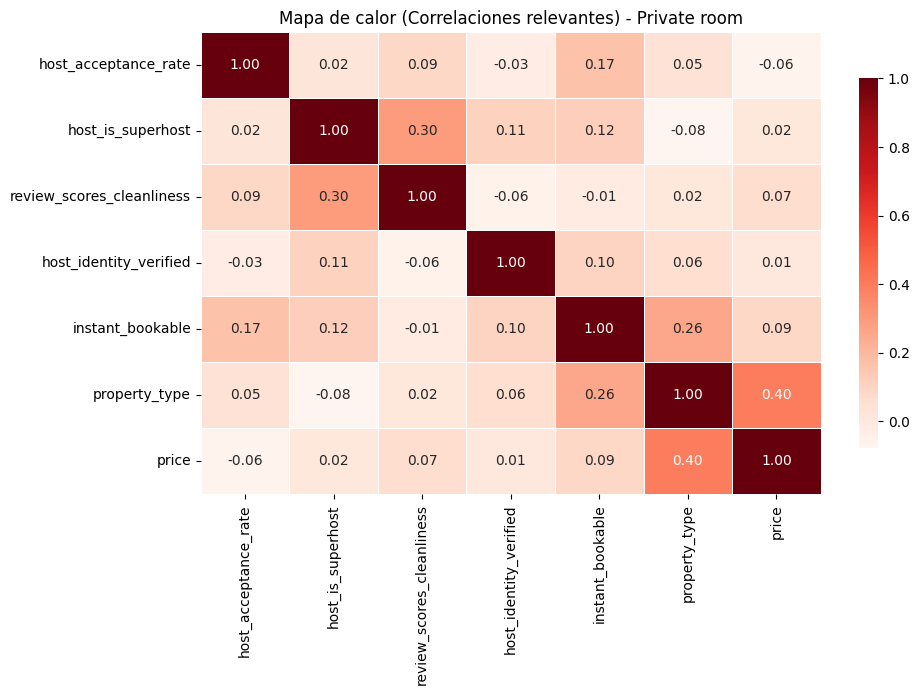


Comparaciones para: Shared room


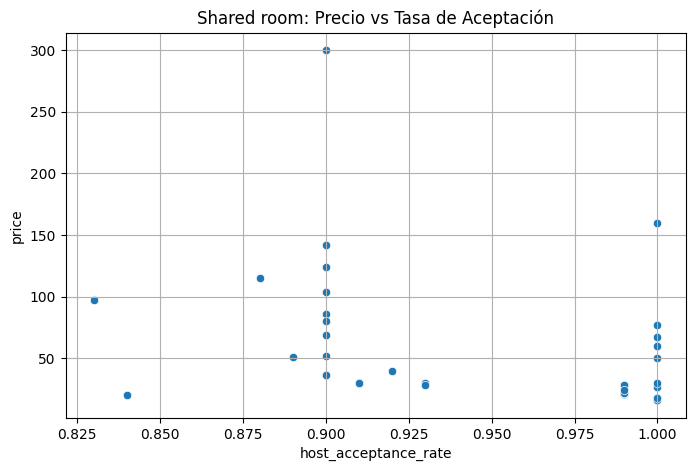

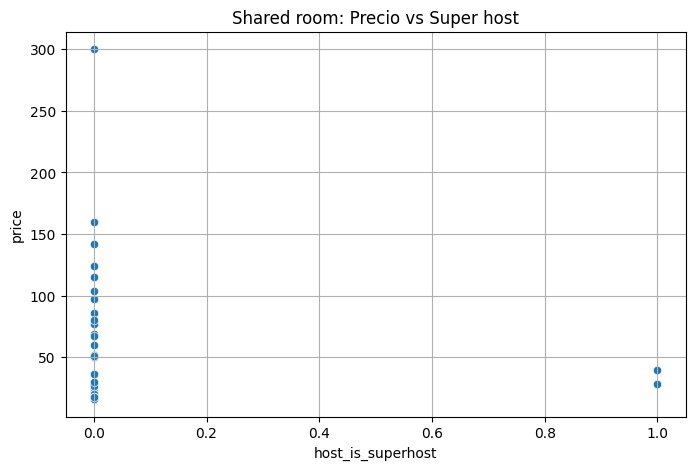

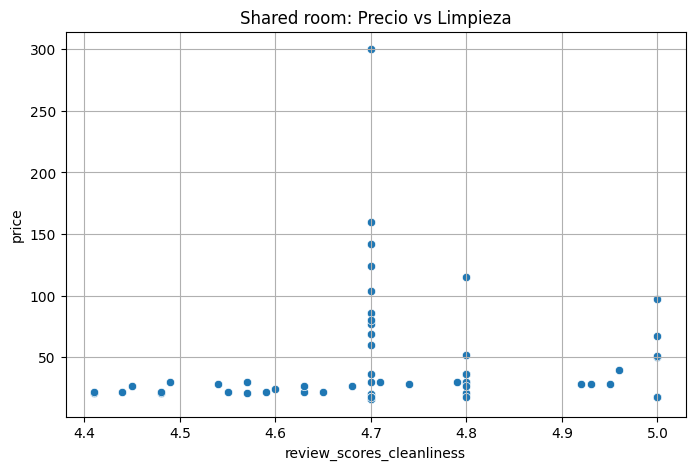

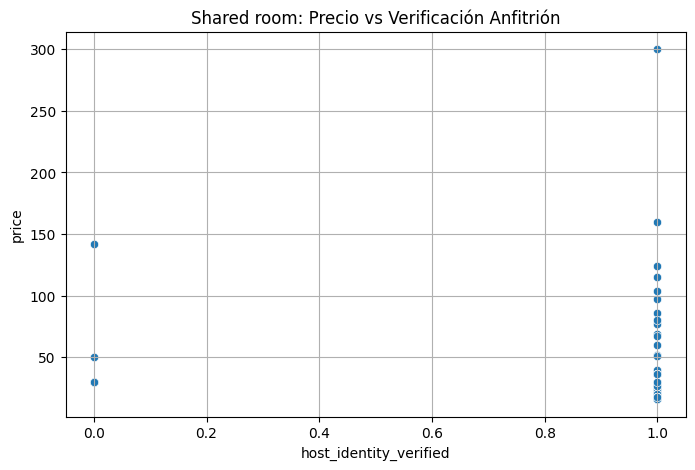

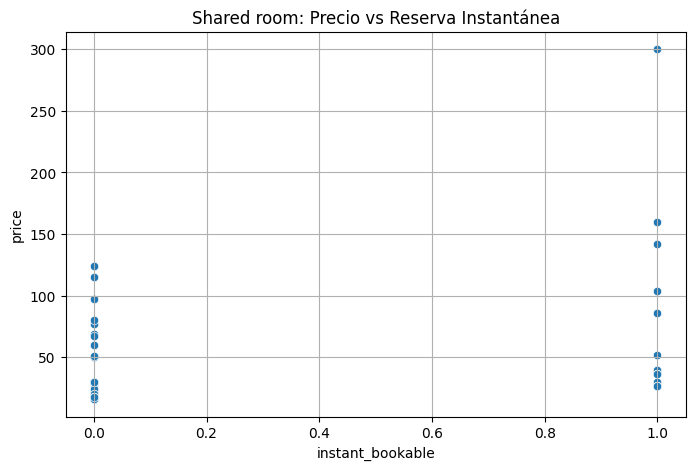

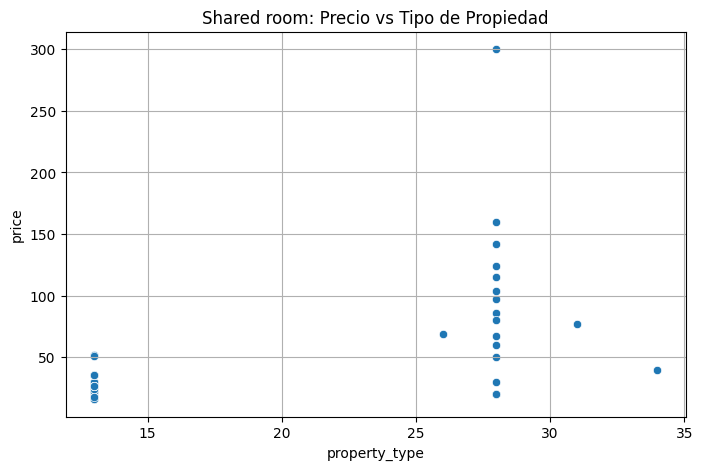

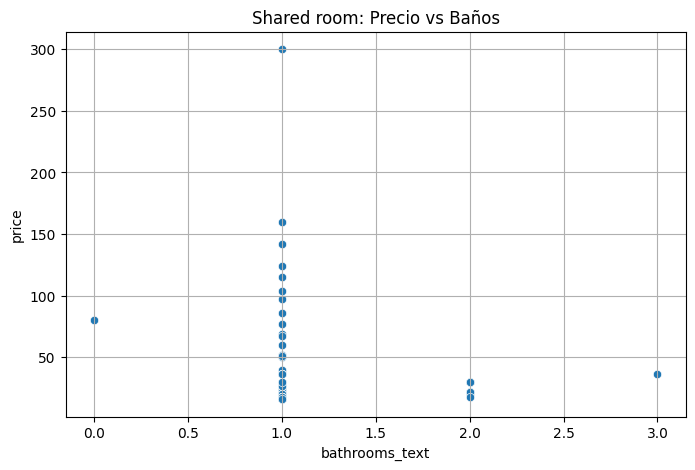

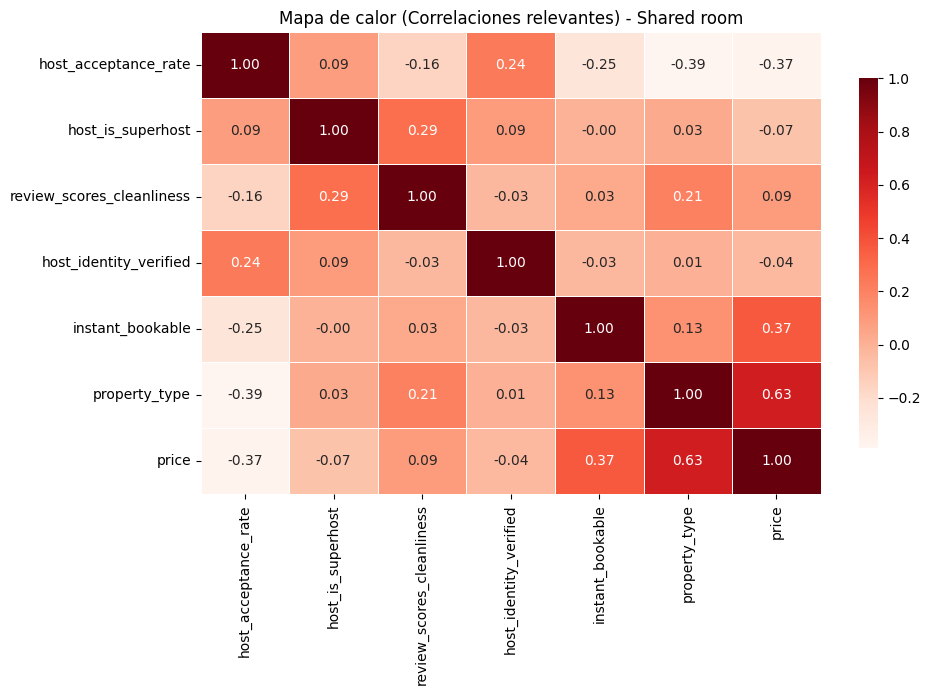


Comparaciones para: Hotel room


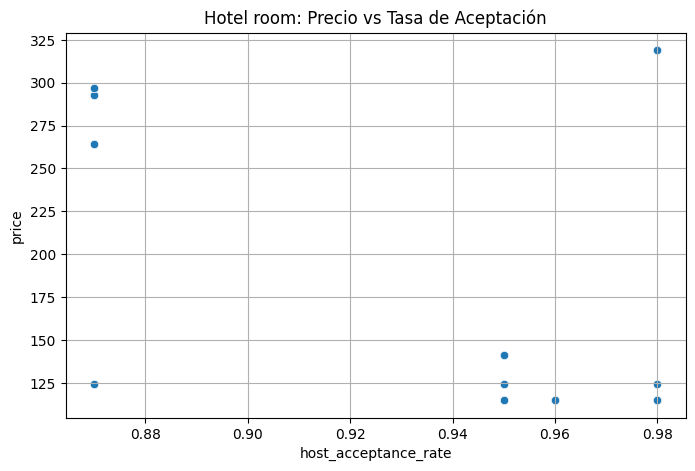

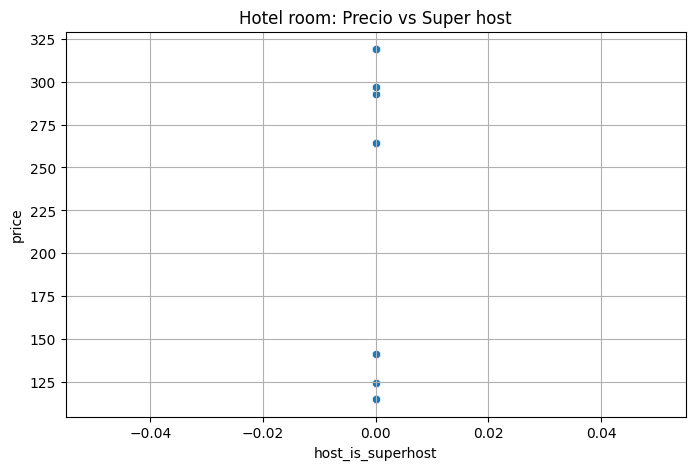

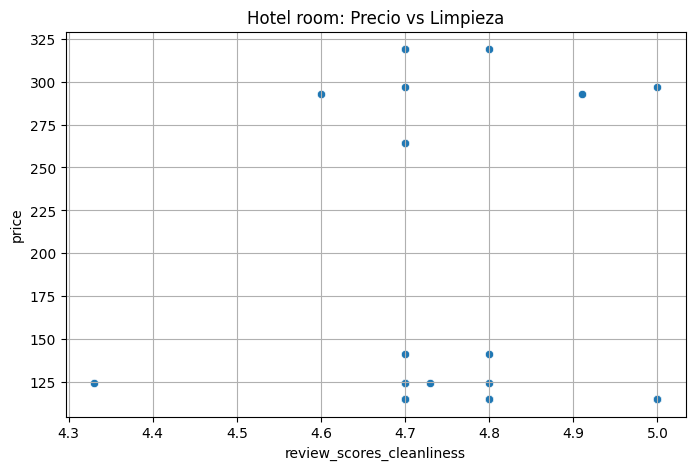

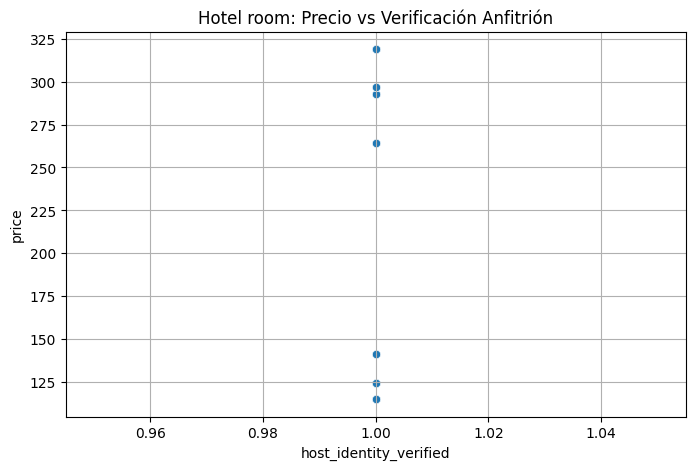

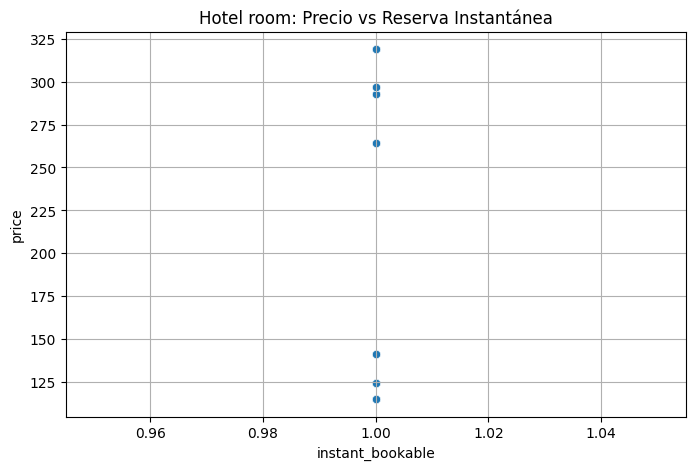

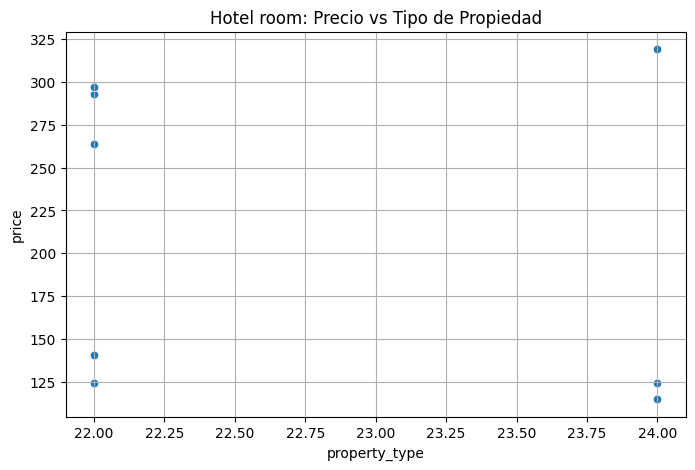

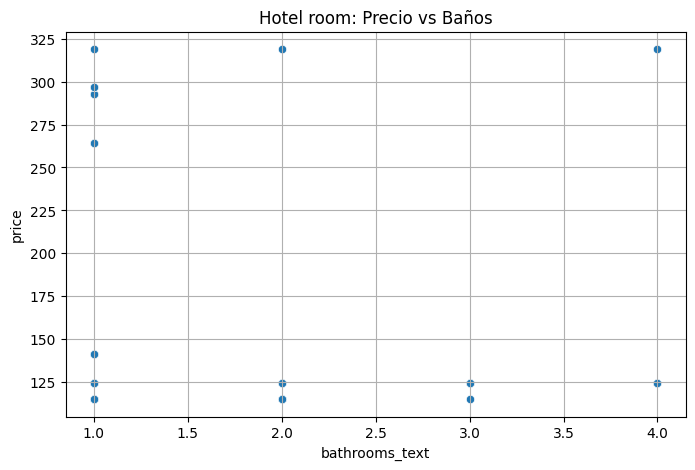

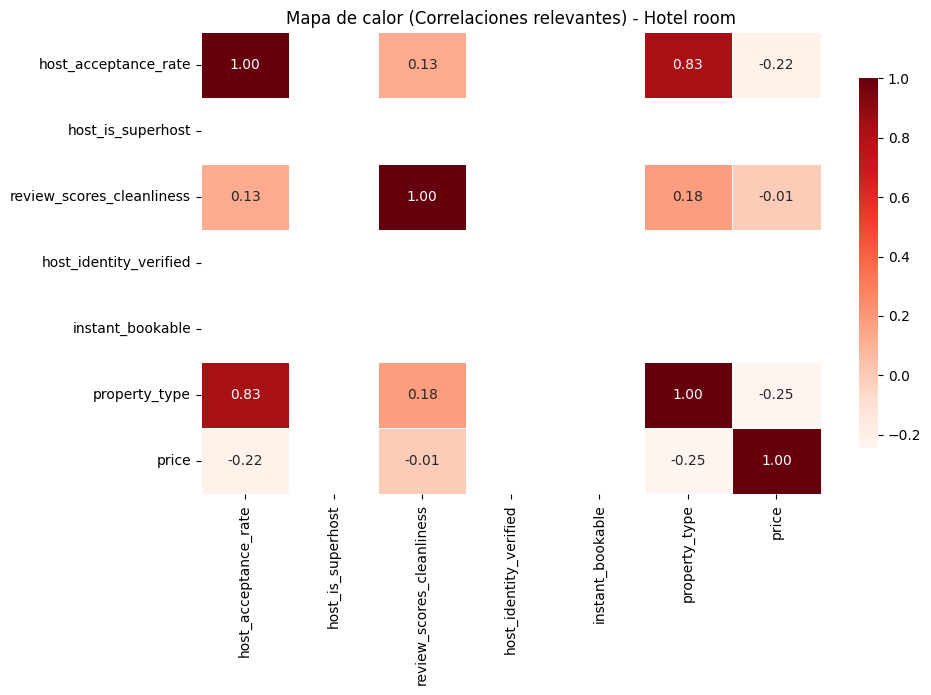

In [ ]:
# Comparaciones por tipo de habitación
def comparaciones_por_tipo(df_types):
    for room_type, df in df_types.items():
        print(f"\nComparaciones para: {room_type}")

        scatter_plot(df, 'host_acceptance_rate', 'price', f'{room_type}: Precio vs Tasa de Aceptación')

        scatter_plot(df, 'host_is_superhost', 'price', f'{room_type}: Precio vs Super host')

        scatter_plot(df, 'review_scores_cleanliness', 'price', f'{room_type}: Precio vs Limpieza')

        scatter_plot(df, 'host_identity_verified', 'price', f'{room_type}: Precio vs Verificación Anfitrión')

        scatter_plot(df, 'instant_bookable', 'price', f'{room_type}: Precio vs Reserva Instantánea')

        scatter_plot(df, 'property_type', 'price', f'{room_type}: Precio vs Tipo de Propiedad')

        scatter_plot(df, 'bathrooms_text', 'price', f'{room_type}: Precio vs Baños')  # Aquí ya usamos bathrooms numérico

        heatmap_correlation(df, room_type)
comparaciones_por_tipo(df_types)

In [11]:
# Función para calcular coeficientes de correlación y determinación
def calcular_coeficientes(df):
    # Variables de interés
    variables = [
        'host_acceptance_rate', 'host_is_superhost', 'review_scores_cleanliness',
        'host_identity_verified', 'instant_bookable', 'property_type', 'bathrooms_text'
    ]
    
    # Diccionario para almacenar resultados
    resultados = {'Variable': [], 'Correlación (r)': [], 'Determinación (R^2)': []}
    
    # Calcular correlación y determinación para cada variable
    for var in variables:
        if var in df.columns:
            r = df[var].corr(df['price'])
            r2 = r ** 2
            resultados['Variable'].append(var)
            resultados['Correlación (r)'].append(r)
            resultados['Determinación (R^2)'].append(r2)
    
    # Convertir a DataFrame
    return pd.DataFrame(resultados)

# Crear una tabla resumen para cada tipo de habitación
tabla_resumen = {}

for room_type, df in df_types.items():
    tabla_resumen[room_type] = calcular_coeficientes(df)

# Mostrar las tablas
for room_type, tabla in tabla_resumen.items():
    print(f"\nCoeficientes para: {room_type}")
    display(tabla)


Coeficientes para: Entire home/apt


c:\Users\leirb\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\leirb\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Variable,Correlación (r),Determinación (R^2)
0,host_acceptance_rate,-0.003570,0.000013
1,host_is_superhost,0.091308,0.008337
2,review_scores_cleanliness,0.111271,0.012381
3,host_identity_verified,-0.005405,0.000029
4,instant_bookable,-0.099068,0.009815
5,property_type,0.161787,0.026175
6,bathrooms_text,0.421685,0.177819



Coeficientes para: Private room


,Variable,Correlación (r),Determinación (R^2)
0,host_acceptance_rate,-0.063860,0.004078
1,host_is_superhost,0.015230,0.000232
2,review_scores_cleanliness,0.068931,0.004751
3,host_identity_verified,0.008073,0.000065
4,instant_bookable,0.088062,0.007755
5,property_type,0.396416,0.157145
6,bathrooms_text,0.020523,0.000421



Coeficientes para: Shared room


,Variable,Correlación (r),Determinación (R^2)
0,host_acceptance_rate,-0.369939,0.136855
1,host_is_superhost,-0.074851,0.005603
2,review_scores_cleanliness,0.090076,0.008114
3,host_identity_verified,-0.036240,0.001313
4,instant_bookable,0.365841,0.133839
5,property_type,0.629448,0.396204
6,bathrooms_text,-0.231473,0.053580



Coeficientes para: Hotel room


,Variable,Correlación (r),Determinación (R^2)
0,host_acceptance_rate,-0.219742,0.048286
1,host_is_superhost,NaN,NaN
2,review_scores_cleanliness,-0.006306,0.000040
3,host_identity_verified,NaN,NaN
4,instant_bookable,NaN,NaN
5,property_type,-0.245334,0.060189
6,bathrooms_text,-0.003589,0.000013
